In [1]:
import numpy as np
import pandas as pd

# MNIST Dataset

In [3]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


[5 0 4 1 9 2 1 3 1 4]


<Figure size 432x288 with 0 Axes>

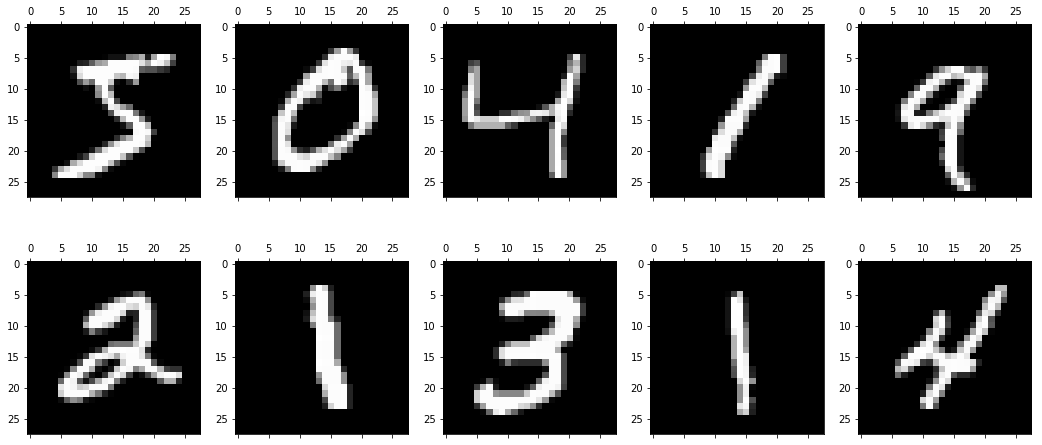

In [5]:
import matplotlib.pyplot as plt

plt.gray()

print(y_train[0:10])

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

# Preprocessing

In [6]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [8]:
from keras.utils import to_categorical

y_train_hot = to_categorical(y_train)

y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

(60000, 10) (10000, 10)


# Define Sigmoid

In [9]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

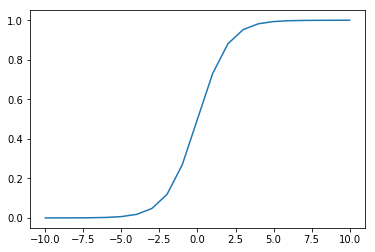

In [10]:
xx = np.linspace(-10, 10, num=21)
yy = sigmoid(xx)

plt.plot(xx, yy)

# Define Cross-Entropy

In [14]:
def cross_entropy(actual, predict, eps=1e-15):
    actual = np.array(actual)
    predict = np.array(predict)
    
    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)
    
    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

# Gradient Descent

In [16]:
num_epoch = 1000
learning_rate = 1.0

num_data = X_train.shape[0]

w = np.random.uniform(low=-1.0, high=1.0, size=(784, 10))
b = np.random.uniform(low=-1.0, high=1.0, size=10)

for epoch in range(num_epoch):
    y_predict_hot = X_train.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    y_predict = np.argmax(y_predict_hot, axis=1)
    
    accuracy = (y_predict == y_train).mean()
    if accuracy > 0.80:
        break
        
    loss = cross_entropy(y_train_hot, y_predict_hot)
    
    if epoch % 10 == 0:
        print("{:2} loss = {:.5f}, accuracy = {:.5f}".format(epoch, loss, accuracy))
        
        w = w - learning_rate * X_train.T.dot(y_predict_hot - y_train_hot) / num_data
        b = b - learning_rate * (y_predict_hot - y_train_hot).mean(axis=0)
        
print("---" * 10)
print("{:2} loss = {:.5f}, accuracy = {:.5f}".format(epoch, loss, accuracy))

/usr/local/var/pyenv/versions/3.6.5/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 0 loss = 17.27234, accuracy = 0.10758
10 loss = 3.45388, accuracy = 0.09872
20 loss = 4.20097, accuracy = 0.08832
30 loss = 3.41265, accuracy = 0.29270
40 loss = 3.39287, accuracy = 0.29012
50 loss = 3.86601, accuracy = 0.50212
60 loss = 1.96084, accuracy = 0.57822
70 loss = 3.58610, accuracy = 0.62142
80 loss = 1.83480, accuracy = 0.59323
90 loss = 1.79716, accuracy = 0.58823
100 loss = 1.88850, accuracy = 0.73642
110 loss = 1.67962, accuracy = 0.61635
120 loss = 2.59573, accuracy = 0.78482
130 loss = 1.60842, accuracy = 0.65800
140 loss = 1.48310, accuracy = 0.68745
------------------------------
141 loss = 1.48310, accuracy = 0.80187


# Evaluate

## Train

In [18]:
y_predict_hot = X_train.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = np.argmax(y_predict_hot, axis=1)

train_result = pd.DataFrame({'actual' : y_train, 'predict' : y_predict})

train_accuracy = (train_result["actual"] == train_result["predict"]).mean()

print("Accuracy(train) = {:.5f}".format(train_accuracy))

print(train_result.shape)
train_result.head(10)

Accuracy(train) = 0.80187
(60000, 2)


/usr/local/var/pyenv/versions/3.6.5/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


,actual,predict
0,5,5
1,0,0
2,4,4
3,1,1
4,9,4
5,2,2
6,1,1
7,3,3
8,1,1
9,4,4


## Test

In [20]:
y_predict_hot = X_test.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = np.argmax(y_predict_hot, axis=1)

test_result = pd.DataFrame({'actual' : y_test, 'predict' : y_predict})

test_accuracy = (test_result["actual"] == test_result["predict"]).mean()

print("Accuracy(test) = {:.5f}".format(test_accuracy))

print(test_result.shape)
test_result.head(10)

Accuracy(test) = 0.80830
(10000, 2)


/usr/local/var/pyenv/versions/3.6.5/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,0
9,9,9
